In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np

In [2]:
# Define oracle for a list of 8 elements with element 7 being the marked element
oracle = QuantumCircuit(3, name='oracle')
oracle.h(2)
oracle.ccx(0, 1, 2)
oracle.h(2)

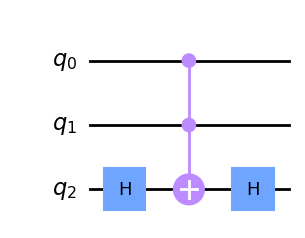

In [3]:
# Visualize the oracle circuit
oracle.to_gate()
oracle.draw('mpl')

In [4]:
# Define Grover's algorithm circuit
grover_circ = QuantumCircuit(3, 3)
grover_circ.h([0, 1, 2])
grover_circ.append(oracle, [0, 1, 2])
grover_circ.h([0, 1, 2])
grover_circ.z([0, 1, 2])
grover_circ.cz(1, 2)
grover_circ.cz(0, 2)
grover_circ.h([0, 1, 2])
grover_circ.measure([0, 1, 2], [0, 1, 2])

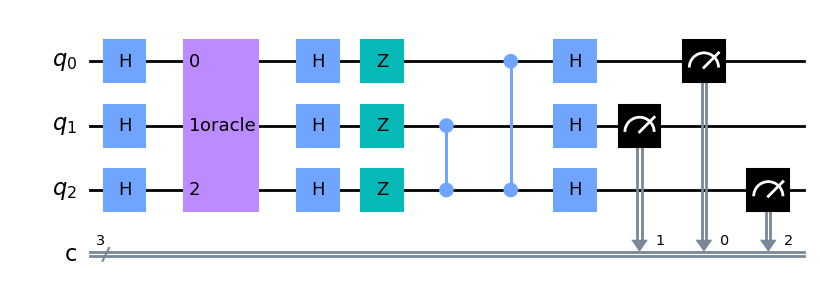

In [5]:
# Visualize the Grover's algorithm circuit
grover_circ.draw('mpl')

In [6]:
# Execute the circuit on a simulator
simulator = Aer.get_backend('qasm_simulator')
counts = execute(grover_circ, backend=simulator, shots=1024).result().get_counts()


In [8]:
counts

{'110': 141, '111': 492, '101': 127, '001': 124, '010': 140}

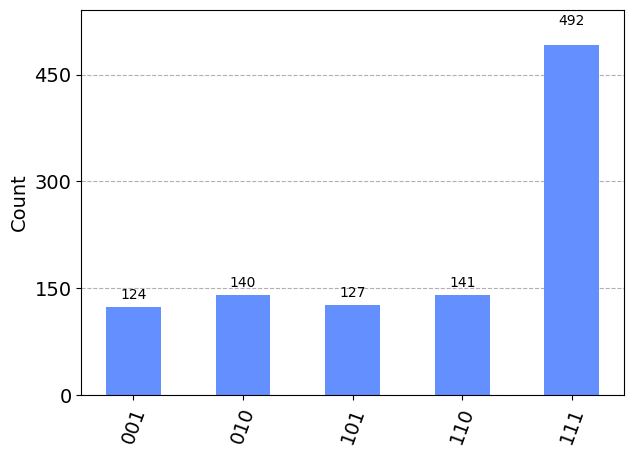

In [7]:
# Plot a histogram of the execution results
plot_histogram(counts)